Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None

Missing values:
PatientId         0
AppointmentID     0
Gender    

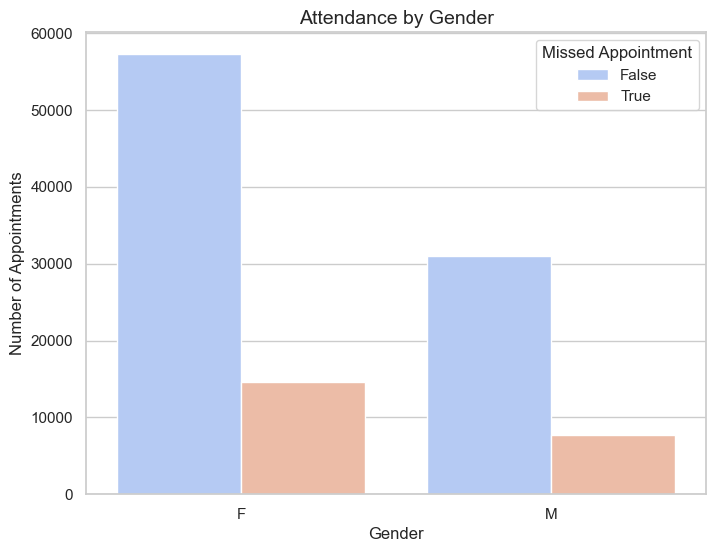

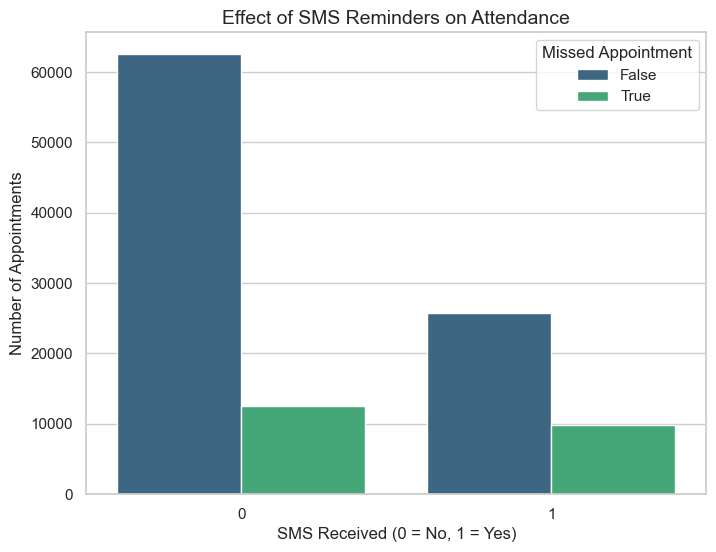

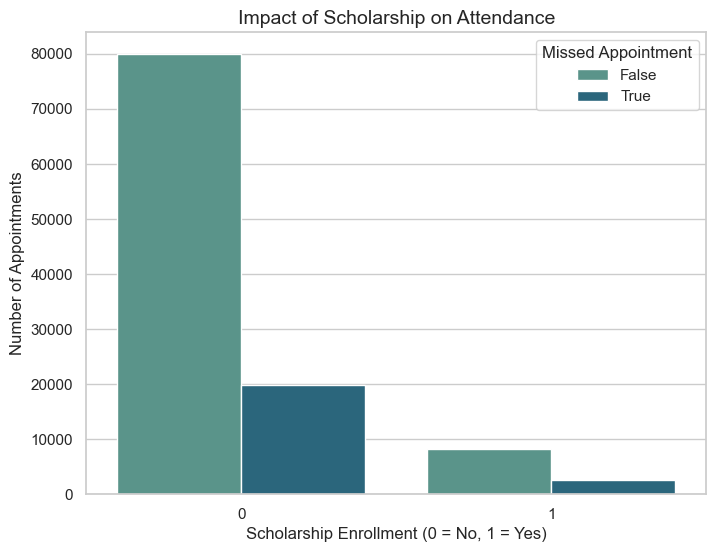

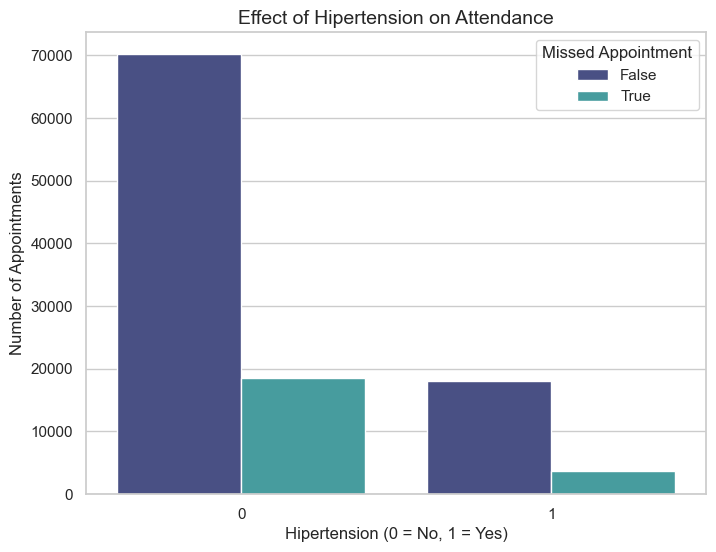

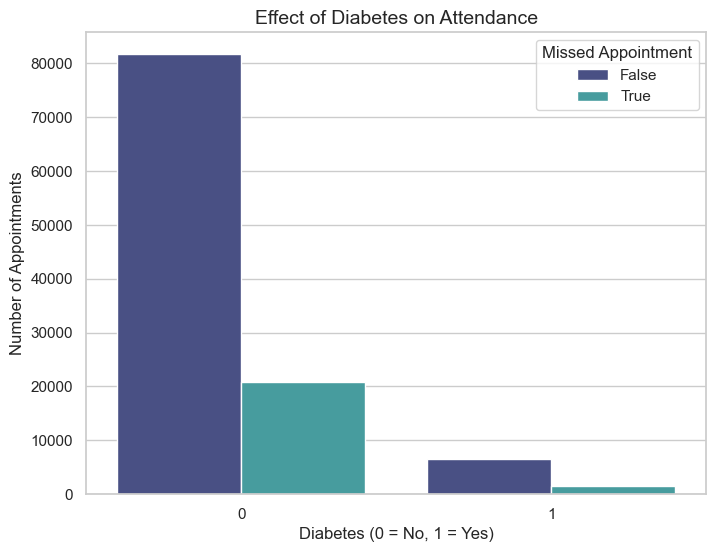

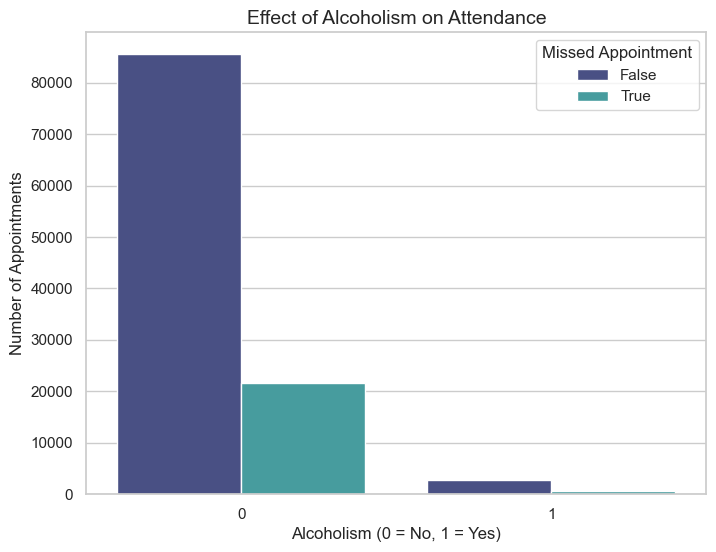

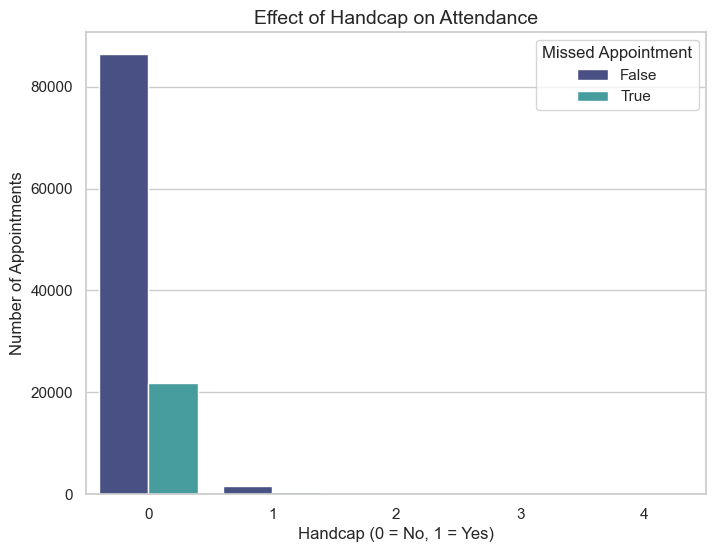

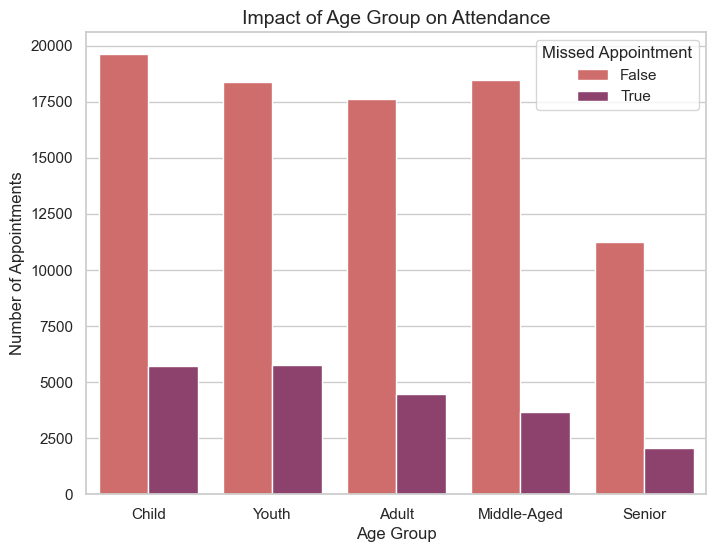

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


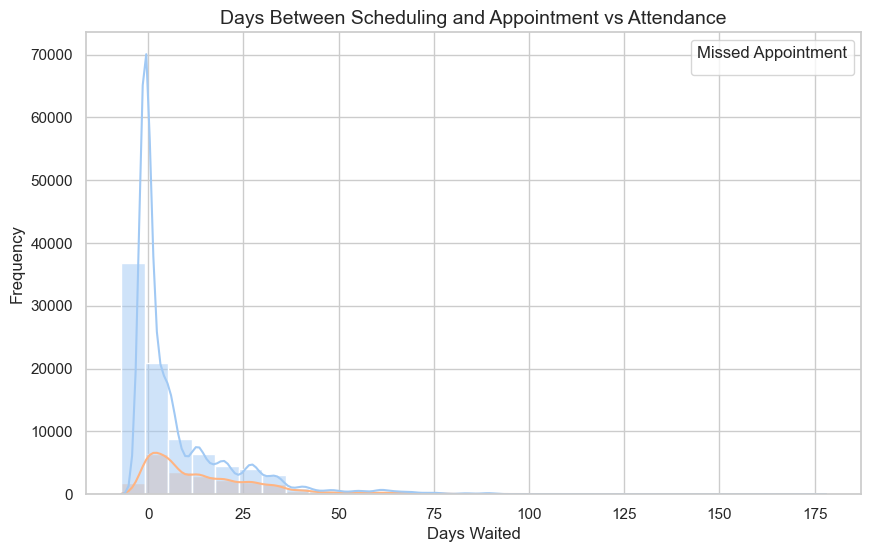

Revised analysis complete. Check the visualizations for insights.


In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global Seaborn style
sns.set_theme(style="whitegrid")

# Load the dataset
file_path = 'noshowappointments-kagglev2-may-2016.csv'  # Replace with the actual dataset file path
data = pd.read_csv(file_path)

# Overview of the dataset
print("Dataset overview:")
print(data.info())
print("\nMissing values:")
print(data.isnull().sum())
print("\nSample rows:")
print(data.head())

# Preprocessing
# Handle missing or invalid values (if any)
data = data.dropna()  # Modify based on specific requirements

# Convert categorical columns for easier analysis
data['No-show'] = data['No-show'].replace({'No': False, 'Yes': True})

# Gender-based attendance analysis
gender_counts = data.groupby(['Gender', 'No-show']).size().reset_index(name='Counts')
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_counts, x='Gender', y='Counts', hue='No-show', palette='coolwarm')
plt.title('Attendance by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Appointments')
plt.legend(title='Missed Appointment')
plt.show()

# SMS reminders and attendance correlation
sms_effect = data.groupby(['SMS_received', 'No-show']).size().reset_index(name='Counts')
plt.figure(figsize=(8, 6))
sns.barplot(data=sms_effect, x='SMS_received', y='Counts', hue='No-show', palette='viridis')
plt.title('Effect of SMS Reminders on Attendance', fontsize=14)
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Number of Appointments')
plt.legend(title='Missed Appointment')
plt.show()

# Scholarship effect on attendance
scholarship_effect = data.groupby(['Scholarship', 'No-show']).size().reset_index(name='Counts')
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Scholarship', hue='No-show', palette='crest')
plt.title('Impact of Scholarship on Attendance', fontsize=14)
plt.xlabel('Scholarship Enrollment (0 = No, 1 = Yes)')
plt.ylabel('Number of Appointments')
plt.legend(title='Missed Appointment')
plt.show()

# Health conditions and attendance
disease_columns = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
for disease in disease_columns:
    plt.figure(figsize=(8, 6))
    disease_effect = data.groupby([disease, 'No-show']).size().reset_index(name='Counts')
    sns.barplot(data=disease_effect, x=disease, y='Counts', hue='No-show', palette='mako')
    plt.title(f'Effect of {disease.capitalize()} on Attendance', fontsize=14)
    plt.xlabel(f'{disease.capitalize()} (0 = No, 1 = Yes)')
    plt.ylabel('Number of Appointments')
    plt.legend(title='Missed Appointment')
    plt.show()

# Age distribution and its impact
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 65, 100],
                           labels=['Child', 'Youth', 'Adult', 'Middle-Aged', 'Senior'])
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Age_Group', hue='No-show', palette='flare')
plt.title('Impact of Age Group on Attendance', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Number of Appointments')
plt.legend(title='Missed Appointment')
plt.show()

# Days between scheduling and appointment analysis
data['Days_Waited'] = (pd.to_datetime(data['AppointmentDay']) - pd.to_datetime(data['ScheduledDay'])).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Days_Waited', hue='No-show', kde=True, palette='pastel', bins=30)
plt.title('Days Between Scheduling and Appointment vs Attendance', fontsize=14)

plt.xlabel('Days Waited')
plt.ylabel('Frequency')
plt.legend(title='Missed Appointment')
plt.show()

# Summary
print("Revised analysis complete. Check the visualizations for insights.")
